In [2]:
import math
import numpy as np
import random
#from scipy.spatial import Delaunay
import drawsvg as draw
import os

In [3]:
def cross(a1, a2, b1, b2):
    """ 
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return False
    intersectX, intersectY = x/z, y/z
    if (b1==a1) or (b2==a1) or (b1==a2) or (b2==a2):
        return False
    lowerx = max(min(a1[0],a2[0]),min(b1[0],b2[0]))
    higherx = min(max(a1[0],a2[0]),max(b1[0],b2[0]))
    lowery = max(min(a1[1],a2[1]),min(b1[1],b2[1]))
    highery = min(max(a1[1],a2[1]),max(b1[1],b2[1]))
    doesCross = (lowerx<=intersectX)and(intersectX<=higherx)and(lowery<=intersectY)and(intersectY<=highery)
    #if doesCross:
        #print(f'a1:{a1} ,a2:{a2} ,b1:{b1} ,b2:{b2} crossing in {intersectX},{intersectY}')
    return doesCross

In [5]:
##############GENERATE THE RANDOM TRIANGULATED DRAWINGS
randomSegmentSet = []

numberOfGraphs = 100
n = 100

windowwidth = 1000
windowheight = windowwidth #square
border = 250

setOfPoints=[]
setOfEdges=[]
setOfNeighbours=[]
setOfDiscardedEdges=[]

for i in range(numberOfGraphs):
    points = []
    points.append([border,windowheight-border])
    points.append([border,border])
    points.append([windowwidth-border,border])
    for j in range(3,n):
        x = border+(windowwidth-2*border)*random.random()
        y = border+(windowheight-2*border)*random.random()
        if y >= windowwidth-x:
            yDist= y-(windowwidth-x)
            x-=yDist
            y-=yDist
        points.append([x,y])
    
    allPossibleEdges = []
    for v in range(n):
        for w in range(v+1,n):
            allPossibleEdges.append([v,w])
            
    neighbours =[]
    for v in range(n):
        neighbours.append([])
    
    random.shuffle(allPossibleEdges)
    
    edges = []
    discardedEdges = []
    
    #print(f'n: {len(points)}, all edges: {len(allPossibleEdges)}')
    numberOfEdges = 0
    i = 0
    while numberOfEdges<(3*n-6):
        checkEdge = allPossibleEdges[i]
        edgeFrom = checkEdge[0]
        edgeTo = checkEdge[1]
        edgeFromCoordinates = points[edgeFrom]
        edgeToCoordinates = points[edgeTo]
        #print(f"we're at: {numberOfEdges} edges")
        if all( (not cross(points[edge[0]],points[edge[1]],edgeFromCoordinates, edgeToCoordinates)) for edge in edges):
            #crossing free, we can add the edge
            edges.append(checkEdge)
            numberOfEdges+=1
            neighbours[checkEdge[0]].append(checkEdge[1])
            neighbours[checkEdge[1]].append(checkEdge[0])
        else:
            discardedEdges.append(checkEdge)
        i+=1

    setOfPoints.append(points)
    setOfEdges.append(edges)
    setOfNeighbours.append(neighbours)
    setOfDiscardedEdges.append(discardedEdges)

In [6]:
###PRINT AS SEGMENTS#####
setOfSegments = []
for i in range(numberOfGraphs):
    points = setOfPoints[i]
    segments = []
    for e in setOfEdges[i]:
        segment =[points[e[0]],points[e[1]]]
        segments.append(segment)
    setOfSegments.append(segments)

In [7]:
print(f'randomSegments = {setOfSegments}')

randomSegments = [[[[750, 250], [267.28416114853337, 412.35836380259525]], [[250, 750], [282.0922333710919, 418.18175128763573]], [[457.6622213518451, 431.78557167603617], [471.9749328028987, 473.2611219432472]], [[437.24408615619404, 322.9592914393086], [297.37044357806644, 401.487563497976]], [[557.3905933683258, 290.5809202106202], [369.51688813693283, 335.3098932135686]], [[606.4805171043248, 350.66090952497575], [297.2208516129099, 666.8838980317297]], [[586.4804545076138, 399.17697288184274], [603.663348719577, 361.53294184612906]], [[250, 250], [547.3113492920113, 255.44830235696895]], [[547.3113492920113, 255.44830235696895], [416.4979486867078, 287.4974855503459]], [[422.16047737392876, 380.357733492182], [335.6233696541269, 425.686556370688]], [[646.9834758402071, 295.5119962757501], [585.9138334339927, 349.38397358454256]], [[750, 250], [350.02041757099266, 493.05463041600785]], [[547.3113492920113, 255.44830235696895], [458.1245080913359, 268.3201733918198]], [[291.94819339

In [8]:
##GENERATE PATHS IN THE PRIMAL##############

In [9]:
alongEdgesPaths = []
for i in range(numberOfGraphs):
    #pick s and t
    s = random.randint(0,n-1)
    t = random.randint(0,n-1)
    while t==s:
        t = random.randint(0,n-1)
    neighbours = setOfNeighbours[i]
    
    #do some bfs on the graph
    predecessor = [-1]*n
    seen = [False]*n
    queue = [t]
    seen[t] = True
    while True:
        vertex = queue.pop(0)
        if vertex==s:
            break
        for neighbour in neighbours[vertex]:
            if not seen[neighbour]:
                seen[neighbour] = True
                predecessor[neighbour] = vertex
                queue.append(neighbour)
    
    points = setOfPoints[i]
    path =[]
    
    while vertex != t:
        point = points[vertex]
        path.append(point)
        vertex = predecessor[vertex]
    alongEdgesPaths.append(path)
    
print(f'alongEdgesPaths = {alongEdgesPaths}')

alongEdgesPaths = [[[713.9782502202866, 271.5208833806819], [750, 250], [694.9717423380998, 261.0591974563278]], [[375.29285692187364, 444.8899551131012], [360.5613315766999, 437.4700250047714], [516.4534919700413, 396.6550545130187]], [[381.85769799986315, 592.2725554258293], [327.91640899933464, 668.5367924413795], [337.2982284472004, 642.9286801670299], [314.7488871955657, 641.396867182849], [347.36043951791163, 550.4957206340924]], [[426.08227502419777, 269.4192848198252], [750, 250], [250, 750], [276.0096278713938, 576.2198320301782]], [[550.7276524168067, 411.1997314292048], [662.6612523313868, 275.1195037230441], [750, 250]], [[465.80666842928827, 374.9630532072732], [482.8708957748843, 456.4068895609935], [370.4400150431137, 311.02108596550283], [347.0392956613753, 280.5677247931209], [270.2177232007072, 278.35744184500265]], [[415.5178746278518, 349.86293199714225], [413.78343027195115, 329.1020584590616], [403.41653155680115, 326.848752896335]], [[488.488917360296, 462.682966

In [10]:
##GENERATE PATHS IN THE DUAL##############

In [11]:
def getAngle(thispoints, indexV, indexW):
    return math.atan2(thispoints[indexV][1] - thispoints[indexW][1], thispoints[indexV][0] - thispoints[indexW][0])
    
    
setOfTriangles = []
setOfDualneighbours = []
for k in range(numberOfGraphs):
    neighbours = setOfNeighbours[k]
    points = setOfPoints[k]
    #sort the neighbours clockwise (or counterclockwise)
    for i in range(n):
        neighboursOfI = neighbours[i]
        neighboursOfI.sort(key=lambda x:getAngle(points,i,x))
    
    #build the set of triangles
    triangles = set()
    dualneighbours = dict()
    for i in range(n): #for every vertex
        v = neighbours[i][len(neighbours[i])-1]
        w = neighbours[v][(neighbours[v].index(i)+1)%len(neighbours[v])]
        tmp_triangle = [i,v,w]
        tmp_triangle.sort()
        tmp_triangle = tuple(tmp_triangle)
        if not tmp_triangle in dualneighbours:
            dualneighbours[tmp_triangle]=set()

        for v in neighbours[i]:
            w = neighbours[v][(neighbours[v].index(i)+1)%len(neighbours[v])]
            triangle = [i,v,w]
            triangle.sort()
            triangle = tuple(triangle)
            triangles.add(triangle)
            if not triangle in dualneighbours:
                dualneighbours[triangle]=set()
            dualneighbours[triangle].add(tmp_triangle)
            dualneighbours[tmp_triangle].add(triangle)
            tmp_triangle = triangle
    setOfTriangles.append(triangles)
    setOfDualneighbours.append(dualneighbours)
                
    #build the set of dual edges by describing neighborhoods.

In [13]:
### now get some paths, similar to the alongEdges Case
alongFacesPaths = []
for i in range(numberOfGraphs):
    triangles = setOfTriangles[i]
    dualneighbours = setOfDualneighbours[i]
    f = len(triangles)
    
    picks = random.sample(triangles, k=2)
    s = picks[0]
    t = picks[1]
    while s==(0,1,2) or t==(0,1,2):
        picks = random.sample(triangles, k=2)
        s = picks[0]
        t = picks[1]
    
    #do some bfs on the graph   
    predecessor = dict()
    seen = dict()
    for triangle in triangles:
        seen[triangle]=False
    queue = [t]
    seen[t] = True
    seen[(0,1,2)]
    while True:
        triangle = queue.pop(0)
        if triangle==s:
            break
        for dualneighbour in dualneighbours[triangle]:
            if not seen[dualneighbour]:
                seen[dualneighbour] = True
                predecessor[dualneighbour] = triangle
                queue.append(dualneighbour)
    
    points = setOfPoints[i]
    path =[]
    
    while triangle != t:
        xCoordinate = (points[triangle[0]][0]+points[triangle[1]][0]+points[triangle[2]][0])/3
        yCoordinate = (points[triangle[0]][1]+points[triangle[1]][1]+points[triangle[2]][1])/3
        point = [xCoordinate,yCoordinate]
        path.append(point)
        triangle = predecessor[triangle]
    alongFacesPaths.append(path)
    
print(f'alongFacesPaths = {alongFacesPaths}')

alongFacesPaths = [[[269.5492280638953, 478.16545185268274], [272.7764763125585, 498.9662809375852], [264.78540277331007, 590.7477052938833], [269.0761151035088, 563.7459044421042], [263.06123870673144, 653.4284013485341], [271.80106528344186, 592.6674240669741], [287.1364196087448, 575.6393210839768], [294.49799949990324, 623.5819664149944]], [[274.01253372363556, 577.8620963263635], [281.6080234122502, 543.4229402767137], [292.59948231361403, 536.3670462734823], [310.6220464994974, 553.8031273416373], [321.60768239110115, 553.571861321912], [347.33622390604404, 516.7456688833068], [380.1441027770226, 474.37894086658054], [384.04193782127254, 487.4238396199016], [415.0527196749187, 478.22443333782763], [498.79697315213707, 420.5026168461391], [581.4087438387402, 353.00762396087674]], [[423.8509457382236, 251.55499845887073], [590.5176124048902, 251.55499845887073], [691.1457819359642, 260.5386032560789], [644.4432774916082, 266.56080328089746], [646.8243369321671, 274.72249888024334],

In [15]:
len(alongFacesPaths)

100

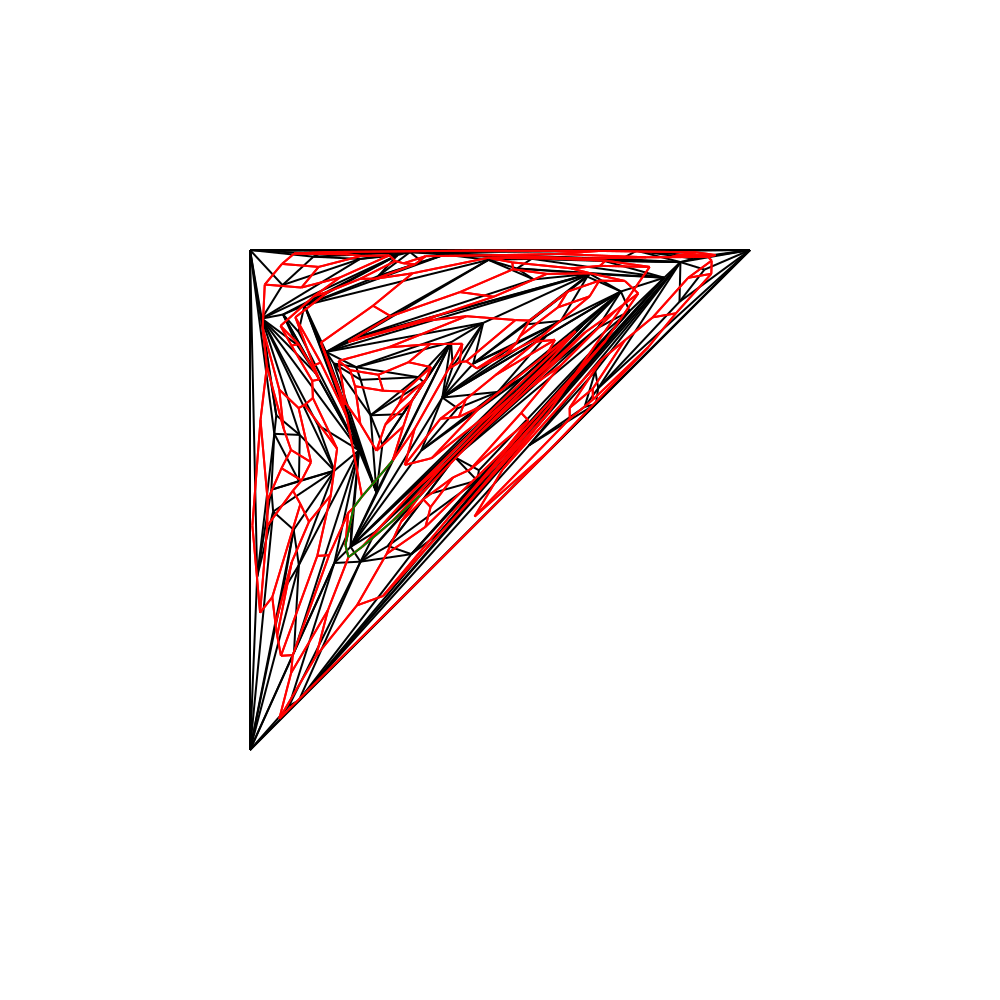

In [138]:
## VISUAL OUTOUT
scaling = 1
d = draw.Drawing(windowwidth*scaling, windowheight*scaling, origin=(0,0))
#draw discarded edges
for e in discardedEdges:
    startx=points[e[0]][0]*scaling
    starty=points[e[0]][1]*scaling
    endx=points[e[1]][0]*scaling
    endy=points[e[1]][1]*scaling
    
    #d.append(draw.Line(startx,starty,endx,endy, stroke='red', stroke_width=2))

#draw edges
for e in edges:
    startx=points[e[0]][0]*scaling
    starty=points[e[0]][1]*scaling
    endx=points[e[1]][0]*scaling
    endy=points[e[1]][1]*scaling
    
    d.append(draw.Line(startx,starty,endx,endy, stroke='black', stroke_width=2))
    
#draw dual edges
for triangle in dualneighbours:
    if triangle ==(0,1,2): continue
    for dn in dualneighbours[triangle]:
        if dn ==(0,1,2): continue
        startx = (points[triangle[0]][0]+points[triangle[1]][0]+points[triangle[2]][0])/3
        starty = (points[triangle[0]][1]+points[triangle[1]][1]+points[triangle[2]][1])/3
        endx = (points[dn[0]][0]+points[dn[1]][0]+points[dn[2]][0])/3
        endy = (points[dn[0]][1]+points[dn[1]][1]+points[dn[2]][1])/3
    
        d.append(draw.Line(startx,starty,endx,endy, stroke='red', stroke_width=2))
    
#draw path
i = 0
while i<(len(path)-1):
    startx=path[i][0]*scaling
    starty=path[i][1]*scaling
    endx=path[i+1][0]*scaling
    endy=path[i+1][1]*scaling
    d.append(draw.Line(startx,starty,endx,endy, stroke='green', stroke_width=2))
    i+=1

d

In [ ]:
###################### TODOS #####################
# make the generated Graphs "final" by puttem them in via plain text
# alongEdgesPaths[]
# alongFacesPaths[]
# add the L strategy

In [7]:
testarray = [[0,1],[0,2]]

In [107]:
print((0,1,2) in setOfTriangles[0])

True


In [9]:
testarray = [0,1,2,3,4,5,6]

In [10]:
testarray[3:]

[3, 4, 5, 6]

In [43]:
 if not os.path.exists("D:/Data/Studium/PhD/Ortho-radial/OUTPUT/"+"test"):
                os.makedirs("D:/Data/Studium/PhD/Ortho-radial/OUTPUT/"+"test")

In [12]:
Länge, Efficiency_Events = [], []
for sta_tmp, sto_tmp in zip(start, stop):
    Länge_tmp = 0
    Efficiency_Events_tmp = 0
    counter1 = 0
    counter2 = 0
    for t in time[counter1:]
:
        if (t > sta_tmp) & (t < sto_tmp):
            Länge_tmp = Länge_tmp+1
        else:
            counter1 = counter1+Länge_tmp
            continue
    for eff in eff_time[counter2:]
:
        if (eff > sta_tmp) & (eff < sto_tmp):
            Efficiency_Events_tmp = Efficiency_Events_tmp+1
        else:
            counter2 = counter2+Efficiency_Events_tmp
            continue
    Länge.append(Länge_tmp)
    Efficiency_Events.append(Efficiency_Events_tmp)

print(np.array([Länge, Efficiency_Events, file].T))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [19]:
folderpath="../../../Desktop/Morphing/OUTPUT_random/"
savename="test"
if not os.path.exists(folderpath+savename):
                os.makedirs(folderpath+savename)